# Task 5-Sales Prediction with Python

### 1. Importing libraries

In [1]:
import pandas as pd 
import numpy as np
import seaborn as sb
import matplotlib.pyplot as mpl
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression as LR 
from sklearn.metrics import classification_report,accuracy_score,mean_absolute_error

### 2. Importing Dataset

In [2]:
dataset = pd.read_csv('Advertising.csv')
dataset

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9
...,...,...,...,...,...
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5


### 3. Display Dataset info

In [3]:
dataset.head()

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [4]:
dataset.tail()

,Unnamed: 0,TV,Radio,Newspaper,Sales
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5
199,200,232.1,8.6,8.7,13.4


In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   TV          200 non-null    float64
 2   Radio       200 non-null    float64
 3   Newspaper   200 non-null    float64
 4   Sales       200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


In [6]:
dataset.shape

(200, 5)

In [7]:
dataset.columns

Index(['Unnamed: 0', 'TV', 'Radio', 'Newspaper', 'Sales'], dtype='object')

In [8]:
dataset.isnull().sum()

Unnamed: 0    0
TV            0
Radio         0
Newspaper     0
Sales         0
dtype: int64

In [9]:
dataset.duplicated().sum()

0

In [10]:
dataset.drop(columns='Unnamed: 0',inplace=True)
dataset.columns

Index(['TV', 'Radio', 'Newspaper', 'Sales'], dtype='object')

In [11]:
dataset

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,9.7
197,177.0,9.3,6.4,12.8
198,283.6,42.0,66.2,25.5


In [12]:
dataset.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


## 4. Data Visualization

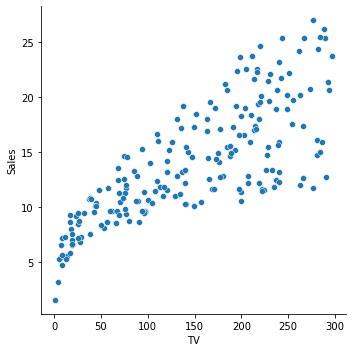

In [13]:
sb.relplot(data=dataset,x=dataset['TV'], y=dataset['Sales'])

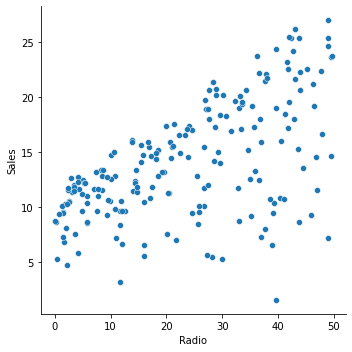

In [14]:
sb.relplot(data=dataset,x=dataset['Radio'], y=dataset['Sales'])

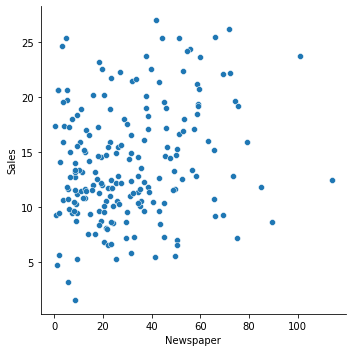

In [15]:
sb.relplot(data=dataset,x=dataset['Newspaper'], y=dataset['Sales'])

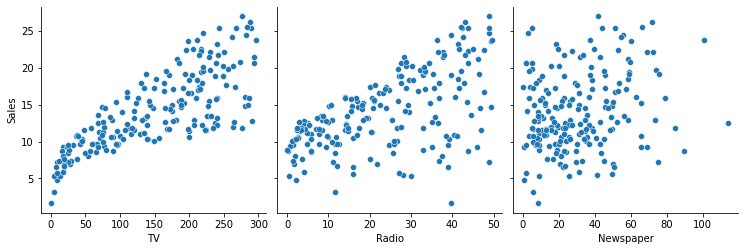

In [16]:
sb.pairplot(data=dataset, x_vars=['TV','Radio','Newspaper'],y_vars=['Sales'],height=3.5)
mpl.show()

In [17]:
dataset.corr()

,TV,Radio,Newspaper,Sales
TV,1.000000,0.054809,0.056648,0.782224
Radio,0.054809,1.000000,0.354104,0.576223
Newspaper,0.056648,0.354104,1.000000,0.228299
Sales,0.782224,0.576223,0.228299,1.000000


<AxesSubplot:>

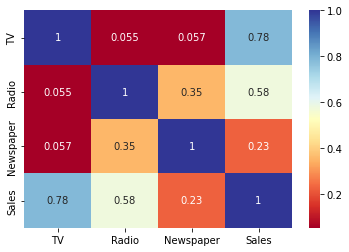

In [18]:
sb.heatmap(data=dataset.corr(),annot=True,cmap='RdYlBu')

## 5. Splitting dataset into Training and Testing Models

In [19]:
X=dataset.drop(columns=['Sales'])
print(X)

        TV  Radio  Newspaper
0    230.1   37.8       69.2
1     44.5   39.3       45.1
2     17.2   45.9       69.3
3    151.5   41.3       58.5
4    180.8   10.8       58.4
..     ...    ...        ...
195   38.2    3.7       13.8
196   94.2    4.9        8.1
197  177.0    9.3        6.4
198  283.6   42.0       66.2
199  232.1    8.6        8.7

[200 rows x 3 columns]


In [20]:
Y=dataset['Sales']
print(Y)

0      22.1
1      10.4
2       9.3
3      18.5
4      12.9
       ... 
195     7.6
196     9.7
197    12.8
198    25.5
199    13.4
Name: Sales, Length: 200, dtype: float64


In [21]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.2,random_state=1)

In [22]:
print(f"X:{X.shape}, X_train:{X_train.shape},X_test:{X_test.shape}")
print(f"Y:{Y.shape}, Y_train:{Y_train.shape},Y_test:{Y_test.shape}")

X:(200, 3), X_train:(160, 3),X_test:(40, 3)
Y:(200,), Y_train:(160,),Y_test:(40,)


## 6. Model Training and Evaluation

In [23]:
linear_model=LR()

In [24]:
linear_model.fit(X_train,Y_train)

LinearRegression()

In [25]:
training_predict=linear_model.predict(X_train)
print(training_predict)

[ 3.65921577  7.25612637  6.00481636 18.46169785  8.37406584 14.12454209
 15.0161764  20.40205426 20.61382233 19.61731651 24.16323248 14.88403603
  6.73108467 19.86205547 18.92113796 12.49612522 14.17816602  6.11982211
 15.33821244  9.59951578 12.04789746 12.04846338  8.52368581 21.61141557
 23.30426145 12.24026439  6.68855681 17.80465348 16.50075138  8.78138524
 20.39682769 20.67376942 24.24311844 10.16119323 10.51556751 16.43194712
 10.46014901  6.66787113 21.36473141 14.43134771 15.49693622 10.09789459
 14.96838524 13.86965306  8.38839734  8.85070713 10.14373392  8.16326623
 17.03095529 15.20888698 16.80513965 23.24354445 13.44178745  9.88629559
 18.11788026 14.82702155  5.393657   12.87619027 11.91409761 12.09709362
 11.73318833 14.99985124  4.60082043 16.36095126 12.08805647 17.79795119
 15.41316291 18.63426135 11.5184553  13.89406999 20.61448534  5.18585939
 13.67777859  7.8029111  21.20030199 13.57370336 11.78689986 10.03359303
  8.96968922 16.95554182 17.33033513 19.23951108 23

In [26]:
training_error = mean_absolute_error(Y_train,training_predict)
print(training_error)

1.328850246099838


In [27]:
testing_predict=linear_model.predict(X_test)
print(testing_predict)

[21.73577184 16.45693776  7.65993185 17.89202679 18.67730671 23.86271904
 16.33623628 13.45649226  9.177296   17.36056228 14.4677995   9.85697601
 17.26057027 16.71866935 15.09530285 15.58923732 12.45188167 17.27925151
 11.0944114  18.06889853  9.33433055 12.91345761  8.7842804  10.46670654
 11.40303174 15.03104665  9.78479388 19.46028647 18.22954934 17.1958903
 21.60304218 14.71901407 16.29205532 12.36432281 19.98831261 15.37556411
 13.96678297 10.06809496 20.97197274  7.45877832]


In [28]:
testing_error = mean_absolute_error(Y_test,testing_predict)
print(testing_error)

1.0402154012924716


In [29]:
print(linear_model.score(X_test,Y_test))

0.8927605914615384


<AxesSubplot:ylabel='Sales'>

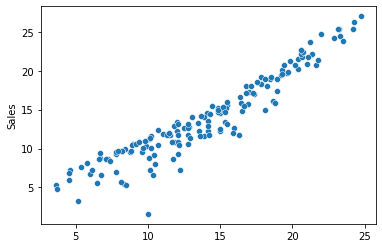

In [30]:
sb.scatterplot(x=training_predict,y=Y_train)

<AxesSubplot:ylabel='Sales'>

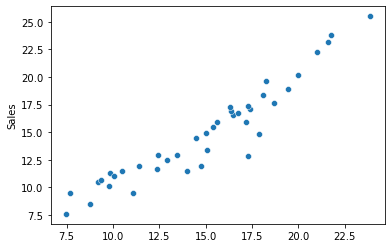

In [31]:
sb.scatterplot(x=testing_predict,y=Y_test)